In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
%matplotlib inline
from SparseFactorization.sparse_factorization import *
import torch
import matplotlib
import matplotlib.pyplot as plt

/dfs/scratch0/maxlam/env3/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [7]:
def generate_product_of_rank_1_matrix(n, n_products, seed=0):
    """
    n - Dimension of the square matrix
    n_products - How many factors (I + u v^T) to product over
    seed - random seed
    """
    np.random.seed(seed)
    factors = [np.eye(n) + np.random.randn(n, 1).dot(np.random.randn(n, 1).T) for i in range(n_products)]
    result = factors[0]
    for factor in factors[1:]:
        result = result.dot(factor)
    return result

In [8]:
n = 100
target_matrix_to_factor_1_factor = generate_product_of_rank_1_matrix(n, 1)
target_matrix_to_factor_2_factor = generate_product_of_rank_1_matrix(n, 2)
target_matrix_to_factor_4_factor = generate_product_of_rank_1_matrix(n, 4) / 100 # Hm these values are quite large
print(np.linalg.norm(target_matrix_to_factor_1_factor))
print(np.linalg.norm(target_matrix_to_factor_2_factor))
print(np.linalg.norm(target_matrix_to_factor_4_factor))

105.38467995067212
514.5078375615203
231.53615480838218


SparseFactorizationWithL1AndPruningPytorch: Frob error: 104.795, Loss: 107.964, Variables NNzs: [18251, 18182], Sum NNzs: 36433
SparseFactorizationWithL1AndPruningPytorch: Frob error: 2.52713, Loss: 7.99944, Variables NNzs: [1878, 1882], Sum NNzs: 3760
SparseFactorizationWithL1AndPruningPytorch: Frob error: 0.980593, Loss: 4.91913, Variables NNzs: [1004, 990], Sum NNzs: 1994
SparseFactorizationWithL1AndPruningPytorch: Frob error: 0.88394, Loss: 4.44082, Variables NNzs: [670, 651], Sum NNzs: 1321
SparseFactorizationWithL1AndPruningPytorch: Frob error: 0.873693, Loss: 4.21807, Variables NNzs: [570, 571], Sum NNzs: 1141
SparseFactorizationWithL1AndPruningPytorch: Frob error: 0.880813, Loss: 4.02947, Variables NNzs: [545, 552], Sum NNzs: 1097
SparseFactorizationWithL1AndPruningPytorch: Frob error: 0.893415, Loss: 3.88313, Variables NNzs: [438, 437], Sum NNzs: 875
SparseFactorizationWithL1AndPruningPytorch: Frob error: 0.901568, Loss: 3.80977, Variables NNzs: [383, 384], Sum NNzs: 767
Spars

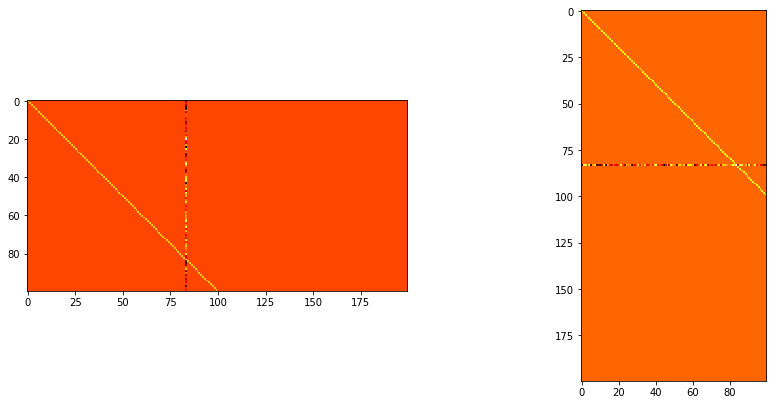

In [9]:
#####################################################################
# Factorize the 1-factor matrix into a sparse product of 2 matrices #
#####################################################################
%autoreload 2

# Factorize
hyperparameters = {
    "learning_rate" : 8e-3,
    "l1_parameter" : 1e-2,
    "pruning_threshold" : 1e-3,
    "intermediate_dimension" : n*2,
    "training_iters" : 50000,
    "initialization_stdev" : .01,
    "log_every" : 1000
}
factorizer = SparseFactorizationWithL1AndPruningPytorch(hyperparameters=hyperparameters)
recovered_factors, details = factorizer.factorize(target_matrix_to_factor_1_factor)

# Print stats
A_1, A_2 = recovered_factors
print("A1 nnz count", np.count_nonzero(A_1))
print("A2 nnz count", np.count_nonzero(A_2))
print("Frob Err", np.linalg.norm(A_1.dot(A_2) - target_matrix_to_factor_1_factor))

# Show matrices
plt.figure(1, figsize=(15,15))
ax1 = plt.subplot(221)
ax1.imshow(A_1, cmap='hot', interpolation='nearest')
ax1 = plt.subplot(222)
ax1.imshow(A_2, cmap='hot', interpolation='nearest')

SparseFactorizationWithL1AndPruningPytorch: Frob error: 514.418, Loss: 517.598, Variables NNzs: [18327, 18256], Sum NNzs: 36583
SparseFactorizationWithL1AndPruningPytorch: Frob error: 16.8584, Loss: 29.5973, Variables NNzs: [2251, 2241], Sum NNzs: 4492
SparseFactorizationWithL1AndPruningPytorch: Frob error: 4.36711, Loss: 15.5749, Variables NNzs: [1602, 1598], Sum NNzs: 3200
SparseFactorizationWithL1AndPruningPytorch: Frob error: 4.4705, Loss: 14.879, Variables NNzs: [1222, 1244], Sum NNzs: 2466
SparseFactorizationWithL1AndPruningPytorch: Frob error: 4.48538, Loss: 14.3424, Variables NNzs: [1066, 1101], Sum NNzs: 2167
SparseFactorizationWithL1AndPruningPytorch: Frob error: 4.47827, Loss: 13.8763, Variables NNzs: [926, 981], Sum NNzs: 1907
SparseFactorizationWithL1AndPruningPytorch: Frob error: 4.47276, Loss: 13.5016, Variables NNzs: [845, 857], Sum NNzs: 1702
SparseFactorizationWithL1AndPruningPytorch: Frob error: 4.46712, Loss: 13.1892, Variables NNzs: [754, 761], Sum NNzs: 1515
Spars

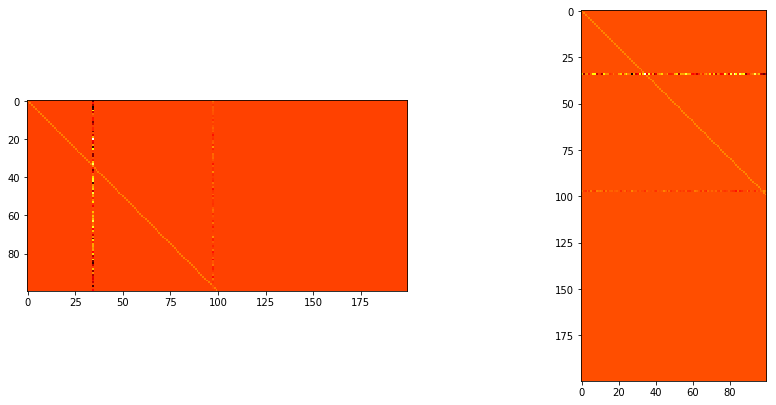

In [10]:
#####################################################################
# Factorize the 2-factor matrix into a sparse product of 2 matrices #
#####################################################################
%autoreload 2

# Factorize
hyperparameters = {
    "learning_rate" : 8e-3,
    "l1_parameter" : 1e-2,
    "pruning_threshold" : 1e-3,
    "log_every" : 1000,
    "intermediate_dimension" : n*2,
    "training_iters" : 50000,
    "initialization_stdev" : .01
}
factorizer = SparseFactorizationWithL1AndPruningPytorch(hyperparameters=hyperparameters)
recovered_factors, details = factorizer.factorize(target_matrix_to_factor_2_factor)

# Print stats
A_1, A_2 = recovered_factors
print("A1 nnz count", np.count_nonzero(A_1))
print("A2 nnz count", np.count_nonzero(A_2))
print("Frob Err", np.linalg.norm(A_1.dot(A_2) - target_matrix_to_factor_2_factor))

# Show matrices
plt.figure(1, figsize=(15,15))
ax1 = plt.subplot(221)
ax1.imshow(A_1, cmap='hot', interpolation='nearest')
ax1 = plt.subplot(222)
ax1.imshow(A_2, cmap='hot', interpolation='nearest')

SparseFactorizationWithL1AndPruningPytorch: Frob error: 231.739, Loss: 234.929, Variables NNzs: [18295, 18222], Sum NNzs: 36517
SparseFactorizationWithL1AndPruningPytorch: Frob error: 6.32358, Loss: 15.1743, Variables NNzs: [2181, 2165], Sum NNzs: 4346
SparseFactorizationWithL1AndPruningPytorch: Frob error: 2.1453, Loss: 10.2097, Variables NNzs: [1516, 1521], Sum NNzs: 3037
SparseFactorizationWithL1AndPruningPytorch: Frob error: 1.93144, Loss: 9.05618, Variables NNzs: [1083, 1152], Sum NNzs: 2235
SparseFactorizationWithL1AndPruningPytorch: Frob error: 1.8566, Loss: 8.2927, Variables NNzs: [817, 887], Sum NNzs: 1704
SparseFactorizationWithL1AndPruningPytorch: Frob error: 1.81414, Loss: 7.76719, Variables NNzs: [683, 709], Sum NNzs: 1392
SparseFactorizationWithL1AndPruningPytorch: Frob error: 1.81898, Loss: 7.38692, Variables NNzs: [624, 571], Sum NNzs: 1195
SparseFactorizationWithL1AndPruningPytorch: Frob error: 1.84849, Loss: 7.1038, Variables NNzs: [564, 462], Sum NNzs: 1026
SparseFac

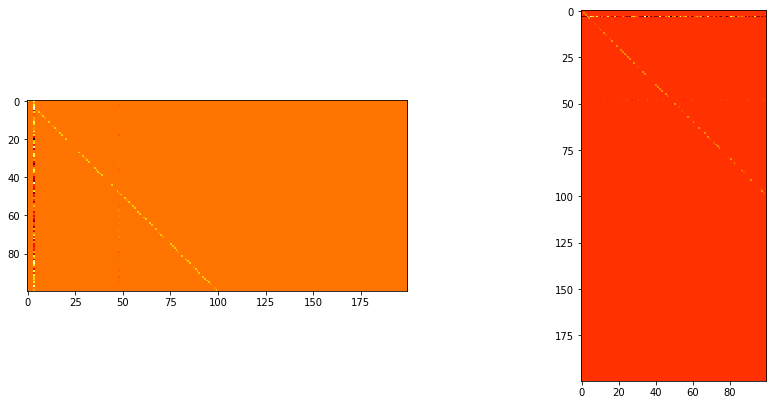

In [11]:
#####################################################################
# Factorize the 4-factor matrix into a sparse product of 2 matrices #
#####################################################################
%autoreload 2

# Factorize
hyperparameters = {
    "learning_rate" : 1e-2,
    "l1_parameter" : 1e-2,
    "pruning_threshold" : 1e-3,
    "intermediate_dimension" : n*2,
    "log_every" : 1000,
    "training_iters" : 50000,
    "initialization_stdev" : .01
}
factorizer = SparseFactorizationWithL1AndPruningPytorch(hyperparameters=hyperparameters)
recovered_factors, details = factorizer.factorize(target_matrix_to_factor_4_factor)

# Print stats
A_1, A_2 = recovered_factors
print("A1 nnz count", np.count_nonzero(A_1))
print("A2 nnz count", np.count_nonzero(A_2))
print("Frob Err", np.linalg.norm(A_1.dot(A_2) - target_matrix_to_factor_4_factor))

# Show matrices
plt.figure(1, figsize=(15,15))
ax1 = plt.subplot(221)
ax1.imshow(A_1, cmap='hot', interpolation='nearest')
ax1 = plt.subplot(222)
ax1.imshow(A_2, cmap='hot', interpolation='nearest')

In [12]:
#####################################################################
# Factorize the 4-factor matrix into a sparse product of 4 matrices #
#####################################################################
%autoreload 2

# Factorize
hyperparameters = {
    "learning_rate" : 5e-2,
    "l1_parameter" : .01,
    "pruning_threshold" : 1e-4,
    "intermediate_dimension" : n*2,
    "training_iters" : 50000,
    "initialization_stdev" : .01,
    "number_of_factors" : 4
}
factorizer = SparseFactorizationWithL1AndPruningPytorch(hyperparameters=hyperparameters)
recovered_factors, details = factorizer.factorize(target_matrix_to_factor_4_factor)

# Print stats
A_1, A_2 = recovered_factors
print("A1 nnz count", np.count_nonzero(A_1))
print("A2 nnz count", np.count_nonzero(A_2))
print("Frob Err", np.linalg.norm(A_1.dot(A_2) - target_matrix_to_factor_4_factor))

# Show matrices
plt.figure(1, figsize=(15,15))
ax1 = plt.subplot(221)
ax1.imshow(A_1, cmap='hot', interpolation='nearest')
ax1 = plt.subplot(222)
ax1.imshow(A_2, cmap='hot', interpolation='nearest')

SparseFactorizationWithL1AndPruningPytorch: Frob error: 231.796, Loss: 241.368, Variables NNzs: [19719, 39416, 39375, 19707], Sum NNzs: 118217
SparseFactorizationWithL1AndPruningPytorch: Frob error: 230.93, Loss: 233.727, Variables NNzs: [11605, 19159, 19101, 11583], Sum NNzs: 61448
SparseFactorizationWithL1AndPruningPytorch: Frob error: 231.384, Loss: 233.142, Variables NNzs: [8269, 16769, 16869, 8183], Sum NNzs: 50090
SparseFactorizationWithL1AndPruningPytorch: Frob error: 201.643, Loss: 204.954, Variables NNzs: [10162, 18745, 18776, 9646], Sum NNzs: 57329
SparseFactorizationWithL1AndPruningPytorch: Frob error: 231.581, Loss: 233.136, Variables NNzs: [6959, 15375, 15197, 6801], Sum NNzs: 44332
SparseFactorizationWithL1AndPruningPytorch: Frob error: 231.554, Loss: 234.119, Variables NNzs: [11205, 19868, 19764, 11123], Sum NNzs: 61960
SparseFactorizationWithL1AndPruningPytorch: Frob error: 230.512, Loss: 232.736, Variables NNzs: [9787, 17632, 17720, 9928], Sum NNzs: 55067
SparseFactori

SparseFactorizationWithL1AndPruningPytorch: Frob error: 231.376, Loss: 234.521, Variables NNzs: [9517, 16914, 16969, 9532], Sum NNzs: 52932
SparseFactorizationWithL1AndPruningPytorch: Frob error: 231.559, Loss: 232.894, Variables NNzs: [5695, 13004, 13102, 5738], Sum NNzs: 37539
SparseFactorizationWithL1AndPruningPytorch: Frob error: 228.999, Loss: 230.281, Variables NNzs: [7141, 15564, 15623, 7174], Sum NNzs: 45502
SparseFactorizationWithL1AndPruningPytorch: Frob error: 231.567, Loss: 233.529, Variables NNzs: [5918, 13232, 13227, 5943], Sum NNzs: 38320
SparseFactorizationWithL1AndPruningPytorch: Frob error: 203.772, Loss: 207.066, Variables NNzs: [9019, 17271, 17185, 8948], Sum NNzs: 52423
SparseFactorizationWithL1AndPruningPytorch: Frob error: 230.956, Loss: 232.277, Variables NNzs: [6320, 14548, 14481, 6442], Sum NNzs: 41791
SparseFactorizationWithL1AndPruningPytorch: Frob error: 231.689, Loss: 234.948, Variables NNzs: [9176, 16992, 16996, 9210], Sum NNzs: 52374
SparseFactorizationW

SparseFactorizationWithL1AndPruningPytorch: Frob error: 186.893, Loss: 190.803, Variables NNzs: [9423, 16748, 16905, 9351], Sum NNzs: 52427
SparseFactorizationWithL1AndPruningPytorch: Frob error: 230.49, Loss: 231.731, Variables NNzs: [6492, 14845, 14821, 6667], Sum NNzs: 42825
SparseFactorizationWithL1AndPruningPytorch: Frob error: 231.607, Loss: 233.373, Variables NNzs: [6138, 13672, 13509, 6026], Sum NNzs: 39345
SparseFactorizationWithL1AndPruningPytorch: Frob error: 231.323, Loss: 233.443, Variables NNzs: [5627, 12809, 12788, 5702], Sum NNzs: 36926
SparseFactorizationWithL1AndPruningPytorch: Frob error: 230.894, Loss: 233.075, Variables NNzs: [6029, 14448, 14498, 5945], Sum NNzs: 40920
SparseFactorizationWithL1AndPruningPytorch: Frob error: 230.814, Loss: 232.343, Variables NNzs: [6490, 13790, 13347, 6281], Sum NNzs: 39908
SparseFactorizationWithL1AndPruningPytorch: Frob error: 231.71, Loss: 234.045, Variables NNzs: [8433, 15013, 15228, 8635], Sum NNzs: 47309
SparseFactorizationWit

SparseFactorizationWithL1AndPruningPytorch: Frob error: 231.607, Loss: 234.069, Variables NNzs: [7780, 14429, 14427, 7508], Sum NNzs: 44144
SparseFactorizationWithL1AndPruningPytorch: Frob error: 231.616, Loss: 233.575, Variables NNzs: [6243, 13053, 12902, 6210], Sum NNzs: 38408
SparseFactorizationWithL1AndPruningPytorch: Frob error: 214.999, Loss: 217.739, Variables NNzs: [8561, 16364, 16194, 8621], Sum NNzs: 49740


KeyboardInterrupt: 

SparseFactorizationWithL1AndPruningPytorch: Frob error: 231.763, Loss: 234.949, Variables NNzs: [18231, 18158], Sum NNzs: 36389
SparseFactorizationWithL1AndPruningPytorch: Frob error: 6.32559, Loss: 14.2034, Variables NNzs: [2044, 1978], Sum NNzs: 4022
SparseFactorizationWithL1AndPruningPytorch: Frob error: 2.18911, Loss: 9.10211, Variables NNzs: [1308, 1334], Sum NNzs: 2642
SparseFactorizationWithL1AndPruningPytorch: Frob error: 2.07396, Loss: 8.07688, Variables NNzs: [905, 876], Sum NNzs: 1781
SparseFactorizationWithL1AndPruningPytorch: Frob error: 2.06932, Loss: 7.46785, Variables NNzs: [682, 647], Sum NNzs: 1329
SparseFactorizationWithL1AndPruningPytorch: Frob error: 2.09598, Loss: 7.07483, Variables NNzs: [559, 522], Sum NNzs: 1081
SparseFactorizationWithL1AndPruningPytorch: Frob error: 2.11667, Loss: 6.7848, Variables NNzs: [460, 431], Sum NNzs: 891
SparseFactorizationWithL1AndPruningPytorch: Frob error: 2.13812, Loss: 6.58141, Variables NNzs: [391, 370], Sum NNzs: 761
SparseFact

SparseFactorizationWithL1AndPruningPytorch: Frob error: 0.0758968, Loss: 0.844592, Variables NNzs: [126, 42], Sum NNzs: 168
SparseFactorizationWithL1AndPruningPytorch: Frob error: 0.0676918, Loss: 0.834303, Variables NNzs: [126, 43], Sum NNzs: 169
SparseFactorizationWithL1AndPruningPytorch: Frob error: 0.0609943, Loss: 0.825355, Variables NNzs: [126, 43], Sum NNzs: 169
SparseFactorizationWithL1AndPruningPytorch: Frob error: 0.0569444, Loss: 0.818751, Variables NNzs: [126, 42], Sum NNzs: 168
SparseFactorizationWithL1AndPruningPytorch: Frob error: 0.052524, Loss: 0.811983, Variables NNzs: [126, 41], Sum NNzs: 167
SparseFactorizationWithL1AndPruningPytorch: Frob error: 0.0495024, Loss: 0.806218, Variables NNzs: [126, 41], Sum NNzs: 167
SparseFactorizationWithL1AndPruningPytorch: Frob error: 0.0476858, Loss: 0.801417, Variables NNzs: [125, 41], Sum NNzs: 166
SparseFactorizationWithL1AndPruningPytorch: Frob error: 0.0466892, Loss: 0.797107, Variables NNzs: [125, 41], Sum NNzs: 166
SparseFac

SparseFactorizationWithL1AndPruningPytorch: Frob error: 0.0779012, Loss: 0.399361, Variables NNzs: [15, 26], Sum NNzs: 41
SparseFactorizationWithL1AndPruningPytorch: Frob error: 0.0779012, Loss: 0.399361, Variables NNzs: [15, 26], Sum NNzs: 41
SparseFactorizationWithL1AndPruningPytorch: Frob error: 0.0779011, Loss: 0.39936, Variables NNzs: [15, 26], Sum NNzs: 41
SparseFactorizationWithL1AndPruningPytorch: Frob error: 0.0779011, Loss: 0.39936, Variables NNzs: [15, 26], Sum NNzs: 41
SparseFactorizationWithL1AndPruningPytorch: Frob error: 0.077901, Loss: 0.39936, Variables NNzs: [15, 26], Sum NNzs: 41
SparseFactorizationWithL1AndPruningPytorch: Frob error: 0.077901, Loss: 0.39936, Variables NNzs: [15, 26], Sum NNzs: 41
SparseFactorizationWithL1AndPruningPytorch: Frob error: 0.077901, Loss: 0.39936, Variables NNzs: [15, 26], Sum NNzs: 41
SparseFactorizationWithL1AndPruningPytorch: Frob error: 0.077901, Loss: 0.39936, Variables NNzs: [15, 26], Sum NNzs: 41
SparseFactorizationWithL1AndPrunin

SparseFactorizationWithL1AndPruningPytorch: Frob error: 0.0326817, Loss: 0.148285, Variables NNzs: [11, 4], Sum NNzs: 15
SparseFactorizationWithL1AndPruningPytorch: Frob error: 0.0326817, Loss: 0.148285, Variables NNzs: [11, 4], Sum NNzs: 15
SparseFactorizationWithL1AndPruningPytorch: Frob error: 0.0326817, Loss: 0.148285, Variables NNzs: [11, 4], Sum NNzs: 15
SparseFactorizationWithL1AndPruningPytorch: Frob error: 0.0326817, Loss: 0.148285, Variables NNzs: [11, 4], Sum NNzs: 15
SparseFactorizationWithL1AndPruningPytorch: Frob error: 0.01542, Loss: 0.13123, Variables NNzs: [19, 4], Sum NNzs: 23
Successive2Factorization - Factorized matrix from 209 => [19,4]
Successive2Factorization - Matrix nnzs: [200, 208, 201, 205, 203]
Factors nnzs [200, 208, 201, 205, 203]


IndexError: index 2 is out of bounds for axis 0 with size 2

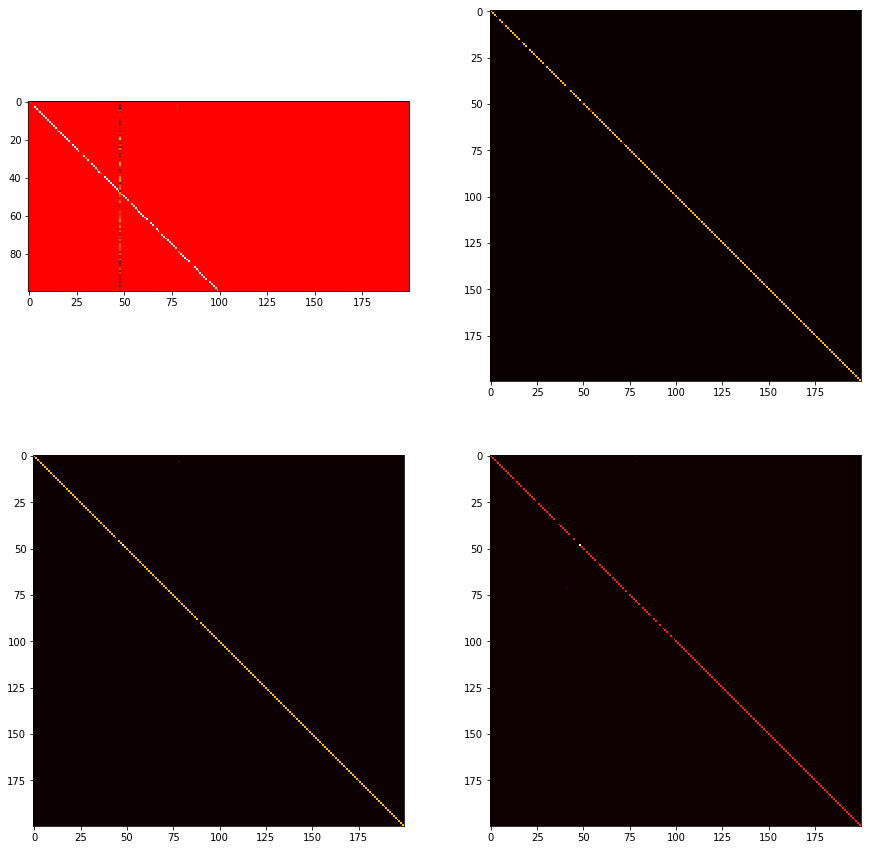

In [13]:
######################################################################################
# Factorize the 4-factor matrix into a sparse product using successive factorization #
######################################################################################
%autoreload 2
plt.rcParams['figure.figsize'] = [10, 5]


# Factorize
hyperparameters_factorizer = {
    "learning_rate" : 1e-2,
    "l1_parameter" : 1e-2,
    "pruning_threshold" : 1e-3,
    "intermediate_dimension" : n*2,
    "log_every" : 1000,
    "training_iters" : 50000,
    "initialization_stdev" : .01
}

hyperparameters_successive_factorizer = {
    "n_factorization_rounds" : 3
}

factorizer = Successive2Factorization(hyperparameters=hyperparameters_successive_factorizer,
                                      factorization_method=SparseFactorizationWithL1AndPruningPytorch,
                                      factorization_method_hyperparameters=hyperparameters_factorizer)
recovered_factors, details = factorizer.factorize(target_matrix_to_factor_4_factor)

# Print stats
print("Factors nnzs", [np.count_nonzero(x) for x in recovered_factors])

# Show matrices
f, axs = plt.subplots(2, 2, figsize=(15,15))
for i, matrix in enumerate(recovered_factors):
    axs[i//2][i%2].imshow(recovered_factors[i], cmap='hot', interpolation='nearest')